In [1]:
#import the library:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data:

In [4]:
df = pd.read_csv('full_data_fraud.csv')
df = df[['category', 'trans_date', 'is_fraud', 'merchant', 'amt', 'cc_num']]

In [5]:
# Preprocess 'trans_date' column

In [6]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_date'] = df['trans_date'].apply(lambda x: x.timestamp()).astype(int)
encoded_features = pd.get_dummies(df[['category', 'merchant']], drop_first=True)

In [7]:
# Drop the original 'category' and 'merchant' columns

In [8]:
df = df.drop(['category', 'merchant'], axis=1)

In [9]:
# Concatenate the original DataFrame with the encoded features

In [10]:
df = pd.concat([df, encoded_features], axis=1)

In [11]:
# Upsample minority class

In [12]:
majority_data = df[df['is_fraud'] == 0]
minority_data = df[df['is_fraud'] == 1]
upsampled_minority_data = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)
upsampled_data = pd.concat((majority_data, upsampled_minority_data))
class_counts = upsampled_data['is_fraud'].value_counts()

In [13]:
# Visualize the value of 'is_fraud' after upsampled

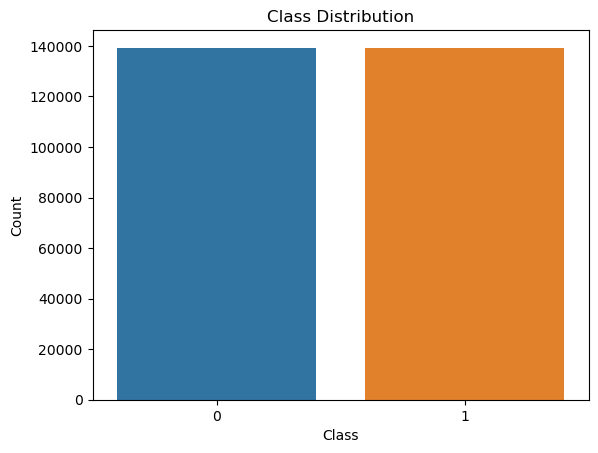

In [14]:
sns.barplot(x=class_counts.index, y=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [15]:
#Feature Selection

In [16]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [17]:
#Split train and test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
# Define the hyperparameters and their corresponding values

In [20]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [None, 5, 10, 20]
}

In [21]:
# Create an instance of the decision tree classifier

In [22]:
model = RandomForestClassifier()

In [23]:
# Perform grid search with cross-validation

In [24]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
# Retrieve the best hyperparameters and the best score

In [26]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [27]:
# Rebuild the decision tree model with the best hyperparameters

In [28]:
model = RandomForestClassifier(**best_params)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [29]:
# Make predictions on the test set

In [30]:
y_pred = model.predict(x_test)

In [31]:
# Model evaluation

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
#Print the result:

In [34]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 5}
Best Score: 0.9984870693670901
Accuracy: 0.9982083990253691
Precision: 0.75
Recall: 0.1111111111111111
F1-Score: 0.19354838709677416


In [35]:
#Visualize

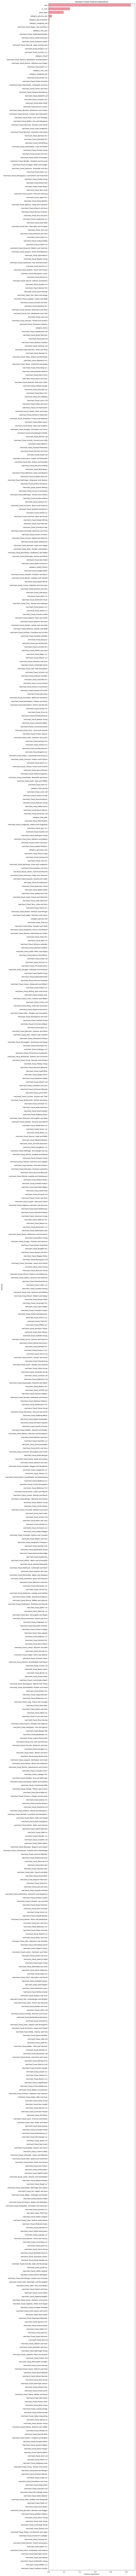

In [37]:
importances = model.feature_importances_
feature_names = x_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 300))
sns.barplot(x=importances[indices], y=sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

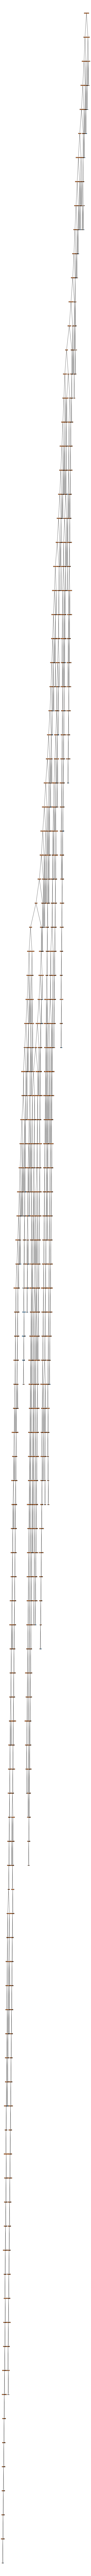

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 300))
tree.plot_tree(model.estimators_[0], feature_names=x_train.columns, filled=True)
plt.show()

In [39]:
# Assuming the model is already trained and stored as 'model'
# Assuming the test data is available as 'test_data'

# Make predictions on the test data
test_predictions = model.predict(x_test)

# Group the test data by credit card number
grouped_data = zip(x_test['cc_num'], test_predictions)

# Iterate through the grouped data
for cc_num, prediction in grouped_data:
    if prediction == 1:
        print("Credit Card", cc_num, "is classified as FRAUD.")

Credit Card 3540000000000000.0 is classified as FRAUD.
Credit Card 30100000000000.0 is classified as FRAUD.
Credit Card 3600000000000000.0 is classified as FRAUD.
Credit Card 180000000000000.0 is classified as FRAUD.
